In [32]:
##This script uses dimensionality reduction algorithms with CDK fingerprints to check if the categories are separated

##Joins the fingerprints with their category and then makes a 2D dimensionality reduction plot coloured by category
import numpy as np

In [33]:
##Creates one dictionary for each file
categoriesFile = open ("categoriesProcessed.csv")
categoriesDictionary={}
for line in categoriesFile:
    line=line.strip("\n")
    line=line.split(",")
    categoriesDictionary[line[0]]=line[1]
categoriesFile.close()
fingerprintsFile = open ("fingerprintsWithoutOnly0or1Positions.txt")
fingerprintsDictionary={}
for line in fingerprintsFile:
    line = line.strip("\n")
    line = line.split(":")
    fingerprintsDictionary[line[0]]=line[1]
fingerprintsFile.close()

In [34]:
##Joins the two dictionaries
##This is not the ideal way of doing it but dictionaries don't accept numpy arrays as a key. The two lists are in the same order.
listOfFingerprints=[]
listOfCategories=[]
for clusterName in fingerprintsDictionary.keys():
    listOfFingerprints.append(np.asarray(list(fingerprintsDictionary[clusterName]),dtype=int))
    listOfCategories.append(categoriesDictionary[clusterName])
fingerprintMatrix=np.concatenate(listOfFingerprints,axis=0)
fingerprintMatrix=fingerprintMatrix.reshape(1031,306)
##Reshape as 1031,306 if using full fingerprints
##Reshape as 1031,104 if using short fingerprints

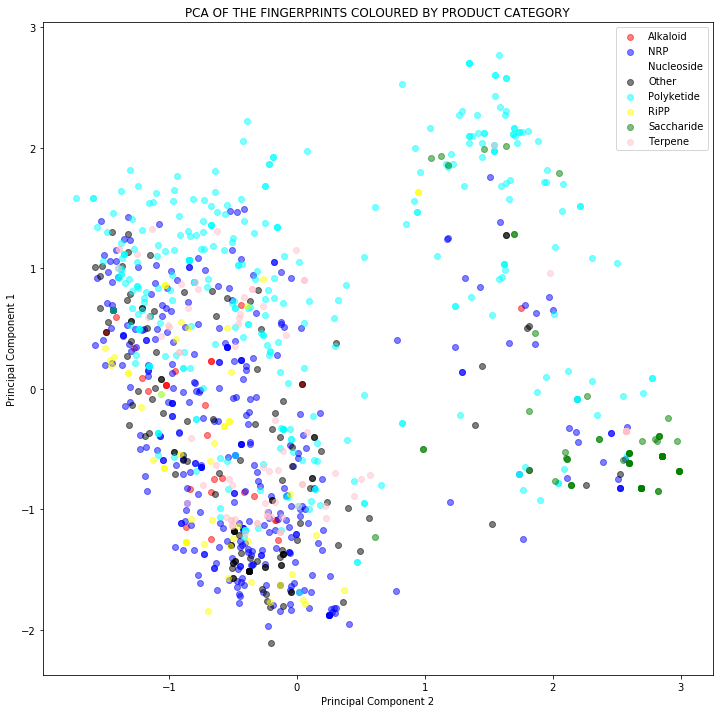

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=15, whiten = False, random_state = 2019)
pcatransform = pca.fit_transform(fingerprintMatrix)
pcareconst = pca.inverse_transform(pcatransform)
plt.figure(figsize=(12,12))
y = np.zeros(1031)
for i in range(0, 1031):
    if listOfCategories[i] == 'Alkaloid':
        y[i]=0
    elif listOfCategories[i] == 'NRP':
        y[i]=1
    elif listOfCategories[i] == 'Nucleoside':
        y[i]=2
    elif listOfCategories[i] == 'Other':
        y[i]=3
    elif listOfCategories[i] == 'Polyketide':
        y[i]=4
    elif listOfCategories[i] == 'RiPP':
        y[i]=5
    elif listOfCategories[i] == 'Saccharide':
        y[i]=6
    elif listOfCategories[i] == 'Terpene':
        y[i]=7
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("PCA OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()

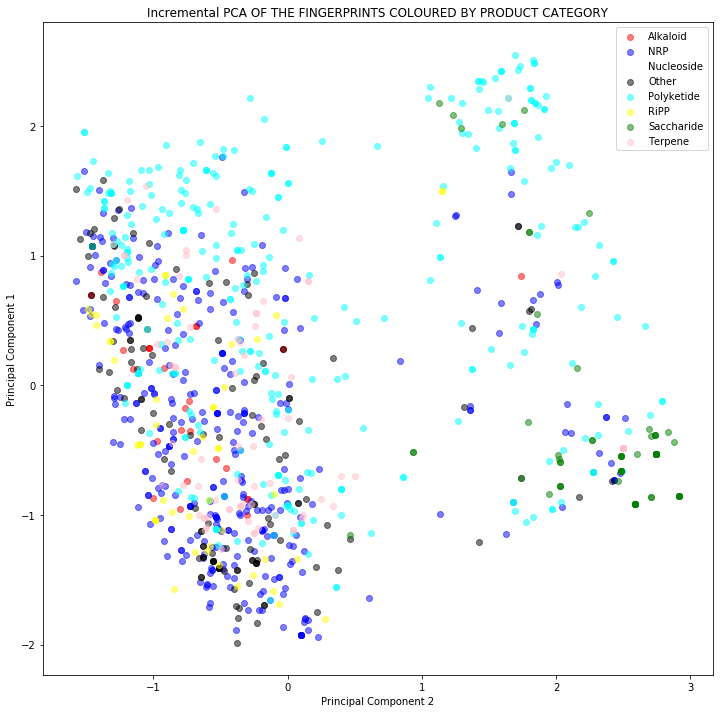

In [36]:
from sklearn.decomposition import IncrementalPCA
n_batches = 256
incrementalpca = IncrementalPCA(n_components=4)
for batch in np.array_split(fingerprintMatrix, n_batches):
  incrementalpca.partial_fit(batch)
pcatransform = incrementalpca.transform(fingerprintMatrix)
pcareconst = incrementalpca.inverse_transform(pcatransform)
plt.figure(figsize=(12,12))
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("Incremental PCA OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()

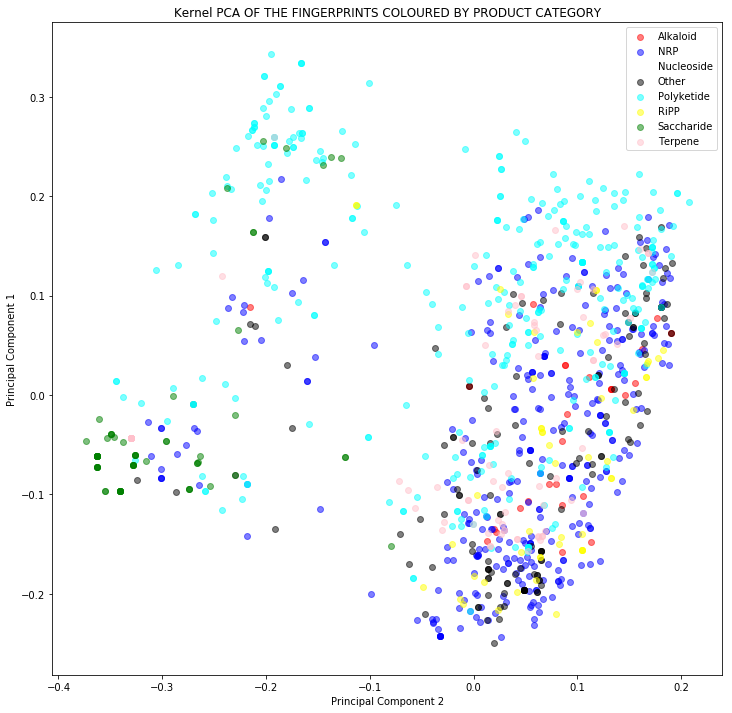

In [37]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf",n_components=154, gamma=None, fit_inverse_transform=True, random_state = 2019, n_jobs=1)
kpca.fit(fingerprintMatrix)
pcatransform = kpca.transform(fingerprintMatrix)
plt.figure(figsize=(12,12))
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("Kernel PCA OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()

C:\Users\Yoo\Downloads\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


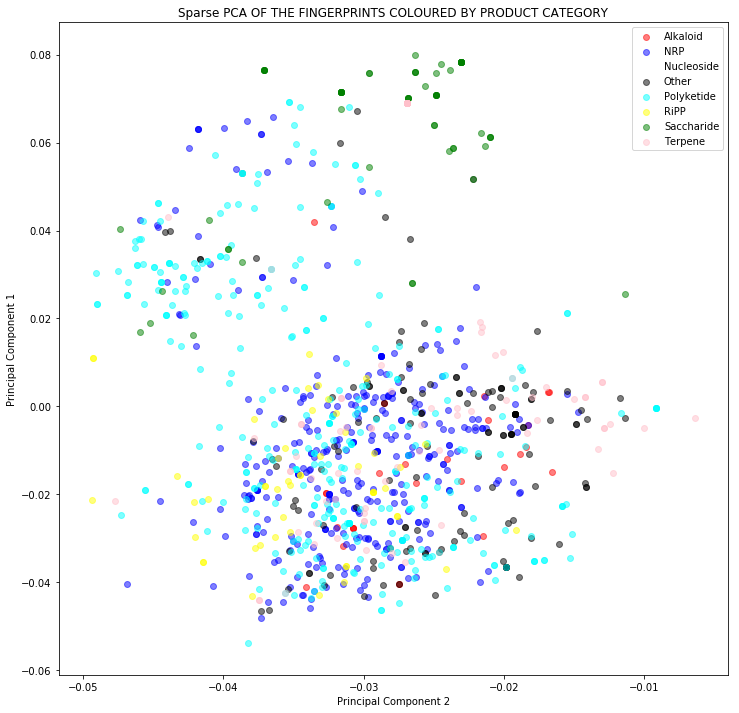

In [38]:
from sklearn.decomposition import SparsePCA
sparsepca = SparsePCA(n_components=154, alpha=0.0001, random_state=2019, n_jobs=-1)
sparsepca.fit(fingerprintMatrix)
pcatransform = sparsepca.transform(fingerprintMatrix)
plt.figure(figsize=(12,12))
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("Sparse PCA OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()

C:\Users\Yoo\Downloads\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


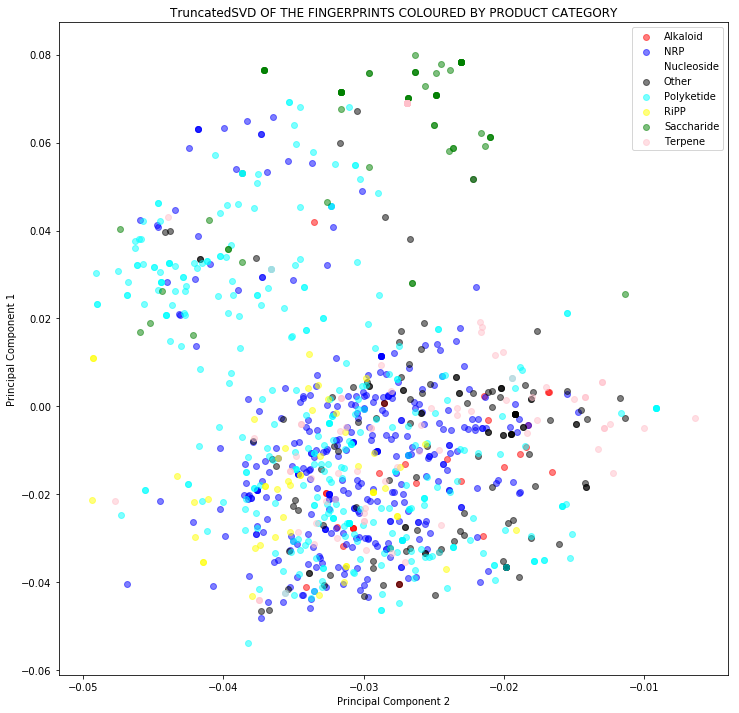

In [39]:
from sklearn.decomposition import TruncatedSVD
svd = SparsePCA(n_components=154, alpha=0.0001, random_state=2019, n_jobs=-1)
svd.fit(fingerprintMatrix)
pcatransform = svd.transform(fingerprintMatrix)
plt.figure(figsize=(12,12))
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("TruncatedSVD OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()

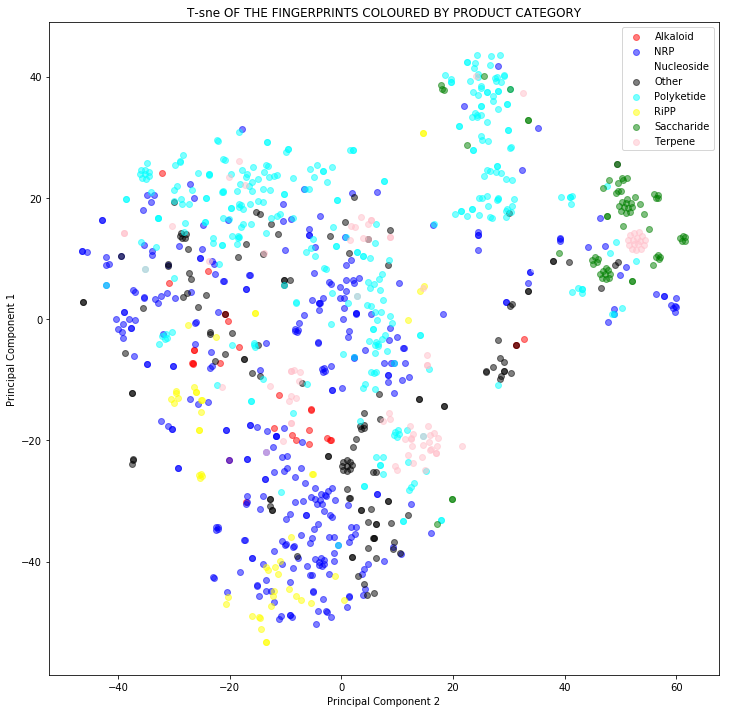

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
pcatransform = tsne.fit_transform(fingerprintMatrix)
plt.figure(figsize=(12,12))
plt.scatter(pcatransform[y==0, 0], pcatransform[y==0, 1], color='red', alpha=0.5,label='Alkaloid')
plt.scatter(pcatransform[y==1, 0], pcatransform[y==1, 1], color='blue', alpha=0.5,label='NRP')
plt.scatter(pcatransform[y==2, 0], pcatransform[y==2, 1], color='white', alpha=0.5,label='Nucleoside')
plt.scatter(pcatransform[y==3, 0], pcatransform[y==3, 1], color='black', alpha=0.5,label='Other')
plt.scatter(pcatransform[y==4, 0], pcatransform[y==4, 1], color='aqua', alpha=0.5,label='Polyketide')
plt.scatter(pcatransform[y==5, 0], pcatransform[y==5, 1], color='yellow', alpha=0.5,label='RiPP')
plt.scatter(pcatransform[y==6, 0], pcatransform[y==6, 1], color='green', alpha=0.5,label='Saccharide')
plt.scatter(pcatransform[y==7, 0], pcatransform[y==7, 1], color='pink', alpha=0.5,label='Terpene')
plt.title("T-sne OF THE FINGERPRINTS COLOURED BY PRODUCT CATEGORY")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend()
plt.show()